---
# 요일별 따릉이 평균 대여량 분석

- 이 노트북에서는 **`rental_weekday_average`** 테이블 데이터를 기반으로  
  서울시 따릉이의 **요일별 평균 대여량**을 분석합니다.
- 분석 결과는 **선 그래프(Line Plot)**로 시각화되며,  
  각 요일별 **수요 패턴의 차이**를 파악하여 정책 수립 및 운영 전략에 활용할 수 있습니다.
---


In [1]:
import mysql.connector
import pandas as pd

class DBManager :
    
    def __init__(self, host, port, user, password, database):
        self.host = host
        self.port = port
        self.user = user
        self.password = password
        self.database = database
        self.db = mysql.connector.connect(
            host=host,
            port=port,
            user=user,
            password=password,
            database=database
        )
        self.cursor = self.db.cursor(buffered=True)
        print("DB connected")

    def close(self):
        if self.cursor:
            self.cursor.close()
        if self.db:
            self.db.close()
        print("DB disconnected")

    def select_all(self, table):
        sql = f"SELECT * FROM {table}"
        self.cursor.execute(sql)
        result = self.cursor.fetchall()
        columns = [col[0] for col in self.cursor.description]
        df = pd.DataFrame(result, columns=columns).reset_index(drop=True)
        return df

    def execute(self, sql):
        self.cursor.execute(sql)
        self.db.commit()
        print("------------------------------------------")
        print("EXECUTED")
        if self.cursor.description is not None:
            result = self.cursor.fetchall()
            print(result)
        return True
    
dbm = DBManager(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port= 3306,
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)


DB connected


In [2]:
df = dbm.select_all("rental_weekday_average")
df

,weekday_name,avg_rental_count
0,Monday,125849.7170
1,Tuesday,124779.1509
2,Wednesday,129377.1346
3,Thursday,131260.7308
4,Friday,135569.6154
5,Saturday,106222.4808
6,Sunday,98722.5962


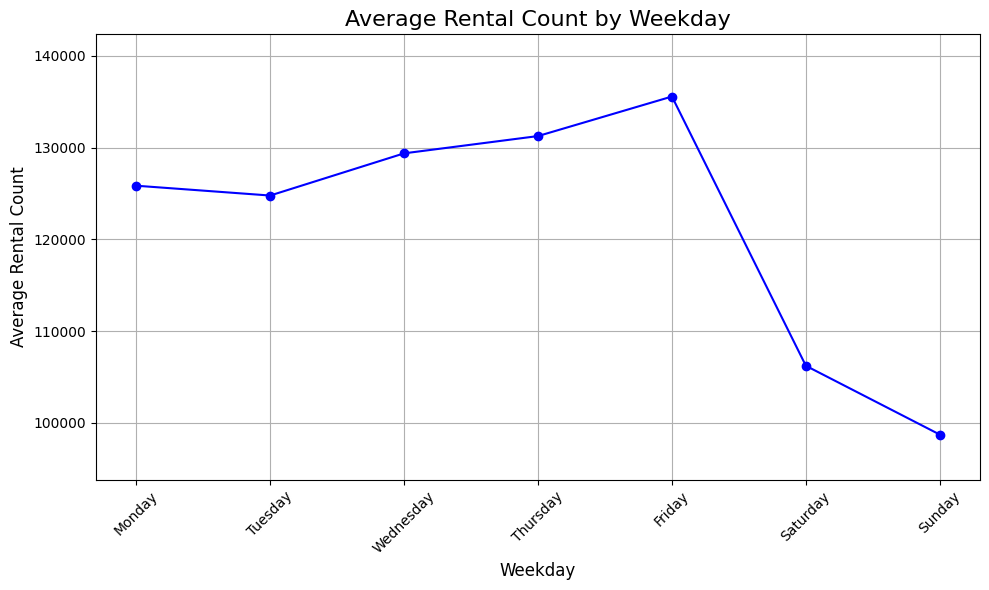

In [4]:
import matplotlib.pyplot as plt

# Decimal → float으로 변환
df['avg_rental_count'] = df['avg_rental_count'].astype(float)

# 선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df['weekday_name'], df['avg_rental_count'], marker='o', linestyle='-', color='blue')

# y축 범위 조정
plt.ylim(df['avg_rental_count'].min() * 0.95, df['avg_rental_count'].max() * 1.05)

# 제목과 라벨 설정
plt.title('Average Rental Count by Weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Average Rental Count', fontsize=12)

# 보기 좋게 눈금 회전 및 격자 추가
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

